In [406]:
## 基础工具
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import jn
from IPython.display import display, clear_output
import time

warnings.filterwarnings('ignore')
%matplotlib inline

## 模型预测的
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,VotingRegressor

## 数据降维处理的
from sklearn.decomposition import PCA,FastICA,FactorAnalysis,SparsePCA,KernelPCA

import lightgbm as lgb
import xgboost as xgb
from sklearn.externals import joblib

## 参数搜索和评价的
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,confusion_matrix

train=pd.read_csv(r'C:\D\Tianchi\used_car_train_20200313\used_car_train_20200313.csv',sep=' ')
testA=pd.read_csv(r'C:\D\Tianchi\used_car_testA_20200313\used_car_testA_20200313.csv',sep=' ')
numeric_label=train.select_dtypes(exclude= ['object']).columns
feature=[col for col in numeric_label if col not in ['SaleID', 'name','regDate','seller','creatDate', 'offerType','price']]
target='price'
X_data=train[feature]
X_data['Time']=(-train['regDate']+train['creatDate'])/(10*0.2e5)
Y_data=train[target]
testA=testA[feature]
X_data=X_data.fillna(-1)
Y_data=Y_data.fillna(-1)
X_test  = testA[feature]
x_train,x_val,y_train,y_val = train_test_split(X_data,Y_data,test_size=0.3)
for feat in X_data.columns:
    x_train[feat]=np.log(x_train[feat]+1-np.min(x_train[feat]))
    x_val[feat]=np.log(x_val[feat]+1-np.min(x_val[feat]))
x_val=np.log(x_val+1)
y_val=np.log(y_val+1)

In [407]:
train

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
5,5,137642,20090602,24.0,10,0.0,1.0,0.0,109,10.0,...,0.260246,0.000518,0.119838,0.090922,0.048769,1.885526,-2.721943,2.457660,-0.286973,0.206573
6,6,2402,19990411,13.0,4,0.0,0.0,1.0,150,15.0,...,0.267998,0.117675,0.142334,0.025446,0.028174,-4.902200,1.610616,-0.834605,-1.996117,-0.103180
7,7,165346,19990706,26.0,14,1.0,0.0,0.0,101,15.0,...,0.239506,0.000000,0.122943,0.039839,0.082413,3.693829,-0.245014,-2.192810,0.236728,0.195567
8,8,2974,20030205,19.0,1,2.0,1.0,1.0,179,15.0,...,0.263833,0.116583,0.144255,0.039851,0.024388,-4.925234,1.587796,0.075348,-1.551098,0.069433
9,9,82021,19980101,7.0,7,5.0,0.0,0.0,88,15.0,...,0.262473,0.068267,0.012176,0.010291,0.098727,-1.089584,0.600683,-4.186210,0.198273,-1.025822


In [394]:
fea='name'
for m in range(1,9):
    re_order=np.ones(train[fea].shape)
    lis=list(train[fea].values)
    a=0
    for i in range(0,train[fea].shape[0]):
        re_order[i]=int(str(train[fea].values[i])[0:m])
    df=pd.DataFrame(re_order,columns=['re_order'])
    df['y']=Y_data
    print(df.corr().values[0,1])

0.0010970068743924551
0.0006731061357705202
0.005150767205905389
0.0192039094700174
0.016694935034956265
0.002029606992390016
0.002029606992390016
0.002029606992390016


In [404]:
print(train['price'].corr(train['name']))

0.002029606992389917


In [380]:
df.corr()

,re_order,y
re_order,1.000000,0.014036
y,0.014036,1.000000


In [391]:
train['name']

0            736
1           2262
2          14874
3          71865
4         111080
5         137642
6           2402
7         165346
8           2974
9          82021
10         18961
11         74495
12        120103
13          8129
14          1896
15         84546
16         10036
17         29756
18        104088
19         15738
20        148669
21         12784
22        131637
23          8949
24         24822
25         12877
26          1983
27          4415
28        129342
29          4365
           ...  
149970    102173
149971    176038
149972    183896
149973     17265
149974       197
149975      3721
149976    113711
149977     23990
149978     62578
149979      7212
149980     20347
149981    127009
149982     11123
149983      2825
149984    108738
149985     60479
149986     85675
149987    191380
149988       261
149989     44522
149990     34661
149991     54959
149992    183499
149993     72087
149994     43073
149995    163978
149996    184535
149997    1475

In [303]:
x=int(str[train['regionCode']].values[-3:])

TypeError: 'type' object is not subscriptable

In [345]:
re_order=np.ones(train['regionCode'].shape)
lis=list(train['regionCode'].values)
a=0
for i in range(0,train['regionCode'].shape[0]):
    re_order[i]=int(str(train['regionCode'].values[i])[-2:])

In [348]:
re_order.shape

(150000,)

In [248]:
from scipy.stats import norm, skew 

# Check the skew of all numerical features
skewed_feats = X_data.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(30)

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    X_data[feat] = boxcox1p(X_data[feat], lam)


Skew in numerical features: 

There are 24 skewed numerical features to Box Cox transform


In [249]:
X_data.head(10)

,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,v_0,v_1,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,Time
0,-0.411096,-0.295697,-0.482483,-0.616423,-0.448445,-0.395459,-0.025054,-1.491922,-0.533659,0.785541,...,0.786323,0.023868,NaN,0.726947,-1.297092,0.644808,-2.609564,0.498151,0.662920,-0.120818
1,-0.153583,-1.924206,0.151938,-0.616423,-0.448445,-1.030317,0.495681,0.699967,0.319156,0.959127,...,0.968578,0.053570,NaN,NaN,NaN,0.510356,-0.509244,NaN,0.216153,0.069625
2,0.921292,0.664067,-0.482483,-0.616423,-0.448445,0.224076,-0.025054,0.112697,0.513317,0.905201,...,0.912861,0.185574,0.130576,-2.916387,NaN,0.450292,0.500227,-0.962214,-0.244798,-0.120880
3,0.861821,0.224924,-2.413767,-0.616423,1.087114,0.356993,0.495681,NaN,0.433076,0.860248,...,0.869075,-0.013627,-1.641075,NaN,NaN,0.336500,-0.220982,NaN,-0.588921,0.918923
4,0.871919,-0.473596,-0.482483,-0.616423,-0.448445,-0.333373,NaN,1.318540,-0.009297,0.466755,...,0.450630,-0.175476,0.557666,1.057285,-0.662665,0.246952,0.320791,1.270338,1.135098,NaN
5,-0.600295,0.224924,-2.413767,0.801488,-0.448445,-0.059725,-1.002609,0.478297,0.602289,-1.782899,...,-1.693113,-0.024355,0.797026,-0.447243,0.418113,-1.560899,0.716144,-0.247449,0.184445,NaN
6,-1.071292,-0.686259,-2.413767,-0.616423,1.087114,0.161654,0.495681,0.235047,0.546547,0.918801,...,0.938421,0.084497,NaN,-2.383140,NaN,0.409081,-0.393528,NaN,-0.103084,0.623783
7,-0.533497,0.587607,-0.482483,-0.616423,-0.448445,-0.108241,0.495681,0.584732,-1.787178,-1.689585,...,-1.747456,-0.008718,-0.917106,0.468065,0.719009,-0.079979,-1.774453,0.170547,0.175334,0.620567
8,-0.788327,-1.924206,0.151938,0.801488,1.087114,0.296750,0.495681,0.791002,0.541474,0.914500,...,0.928372,0.093343,-0.916169,NaN,NaN,0.404115,0.027690,NaN,0.065650,0.071609
9,-1.470422,-0.142161,1.125972,-0.616423,-0.448445,-0.191700,0.495681,NaN,-0.736614,0.396515,...,0.382957,-0.769731,NaN,0.746525,-0.331926,0.167628,NaN,0.144411,-3.189585,0.735528


In [282]:
def build_model_xgb(x_train,y_train):
    model = xgb.XGBRegressor(n_estimators=300, learning_rate=0.05, gamma=0.06, subsample=0.8,\
        colsample_bytree=1, max_depth=11) #, objective ='reg:squarederror'
    model.fit(x_train, y_train)
    return model
model_xgb = build_model_xgb(x_train,y_train)
val_xgb = model_xgb.predict(x_val)
MAE_xgb = mean_absolute_error(y_val,val_xgb)
value[i]=MAE_xgb
print('MAE of val with xgb:',MAE_xgb)

MAE of val with xgb: 12765.87909146967


In [165]:
X_data['Time']=(-train['regDate']+train['creatDate'])/(1*0.4e5)

In [167]:
value=np.ones(25)
for i in range(1,20):
    X_data['Time']=(-train['regDate']+train['creatDate'])/(i*0.2e5)
    Y_data=train[target]
    testA=testA[feature]
    X_data=X_data.fillna(-1)
    Y_data=Y_data.fillna(-1)
    X_test  = testA[feature]
    x_train,x_val,y_train,y_val = train_test_split(X_data,Y_data,test_size=0.3)
    def build_model_xgb(x_train,y_train):
        model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, gamma=0.04, subsample=0.8,\
            colsample_bytree=1, max_depth=11) #, objective ='reg:squarederror'
        model.fit(x_train, y_train)
        return model
    model_xgb = build_model_xgb(x_train,y_train)
    val_xgb = model_xgb.predict(x_val)
    MAE_xgb = mean_absolute_error(y_val,val_xgb)
    value[i]=MAE_xgb
    print('MAE of val with xgb:',MAE_xgb)

MAE of val with xgb: 569.8662287465467
MAE of val with xgb: 571.7941667667653
MAE of val with xgb: 572.7937434818904
MAE of val with xgb: 569.2445140825272
MAE of val with xgb: 569.2674786358754
MAE of val with xgb: 570.1306320168284
MAE of val with xgb: 572.0965290464136
MAE of val with xgb: 569.6350238364126
MAE of val with xgb: 569.8589410933495
MAE of val with xgb: 562.2765602560149
MAE of val with xgb: 566.7734730697963
MAE of val with xgb: 565.9634792091025
MAE of val with xgb: 566.4463596738948
MAE of val with xgb: 576.3498586111492
MAE of val with xgb: 567.8955714926534
MAE of val with xgb: 568.2359950673832
MAE of val with xgb: 564.138511421193
MAE of val with xgb: 565.6305133331458
MAE of val with xgb: 568.6312049188753


In [170]:
para_grid=[{'n_estimators':[150,180,200,250,300],'learning_rate':[0.02,0.05,0.1],'colsample_bytree':[1],'gamma':[0.02,0.04,0.06],'max_depth':[5,7,11,13]}]
grid_search1=GridSearchCV(xgb.XGBRegressor(),para_grid,cv=3,scoring='neg_mean_absolute_error')
grid_search1.fit(x_train,y_train)   

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    subsample=None, tree_method=None,
                                    validate_parameters=False, verbosity=None),
             iid='deprecated', n_jobs=None,
             param_grid=[{'colsample_bytree': [1], 'gamma': [0.02, 0.04, 0.06],
                  

In [173]:
grid_search1.best_params_

{'colsample_bytree': 1,
 'gamma': 0.06,
 'learning_rate': 0.05,
 'max_depth': 11,
 'n_estimators': 300}

In [174]:
grid_search2.best_params_

{'learning_rate': 0.1, 'n_estimators': 300, 'num_leaves': 150}

In [171]:
para_grid=[{'n_estimators':[150,180,200,250,300],'learning_rate':[0.02,0.05,0.1],'num_leaves':[80,100,127,150]}]
grid_search2=GridSearchCV(lgb.LGBMRegressor(),para_grid,cv=3,scoring='neg_mean_absolute_error')
grid_search2.fit(x_train,y_train) 

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'learning_rate': [0.02, 0.05, 0.1],
                          'n_estimators': [150, 180, 200, 250, 300],
                          'num_leaves': [80, 100,

In [44]:
def build_model_lgb(x_train,y_train):
    estimator = lgb.LGBMRegressor(num_leaves=127,n_estimators = 200)
    param_grid = {
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
    }
    gbm = GridSearchCV(estimator, param_grid)
    gbm.fit(x_train, y_train)
    return gbm
model_lgb = build_model_lgb(x_train,y_train)
val_lgb = model_lgb.predict(x_val)
MAE_lgb = mean_absolute_error(y_val,val_lgb)
print('MAE of val with lgb:',MAE_lgb)

MAE of val with lgb: 582.8980171142715


In [45]:
gbr=GradientBoostingRegressor(random_state=42, n_estimators=200)
gbr.fit(x_train,y_train)
val_gbr = gbr.predict(x_val)
MAE_gbr = mean_absolute_error(y_val,val_gbr)
print('MAE of val with lgb:',MAE_gbr)

MAE of val with lgb: 795.1314905314102


In [7]:
vot_r=VotingRegressor([('xgb',model_xgb),('lgb',model_lgb)])

In [15]:
from sklearn.externals import joblib
joblib.dump(gbr,'C:\\D\\Tianchi\\model\\GBR_model.pkl')
joblib.dump(model_lgb,'C:\\D\\Tianchi\\model\\LGB_model.pkl')
joblib.dump(model_xgb,'C:\\D\\Tianchi\\model\\XGB_model.pkl')

In [8]:
vot=vot_r.fit(x_train,y_train).predict(x_val)
MAE_lgb = mean_absolute_error(y_val,vot)
print('MAE of val with lgb:',MAE_lgb)

MAE of val with lgb: 653.4361288356916


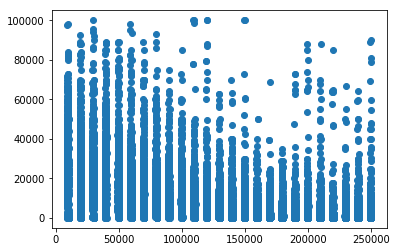

In [25]:
time=train['regDate']-train['creatDate']
plt.scatter(-time,Y_data)

In [145]:
(train.iloc[0:5,-15:])

,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,1.326939,0.320521,NaN,-0.261378,-2.007352,NaN,NaN,NaN,NaN,NaN,NaN,0.030608,NaN,NaN,NaN
1,1.338527,0.504151,NaN,-1.131467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.300846,NaN,NaN,NaN
2,1.342387,0.453341,-1.282759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.528036,-0.802747,NaN,NaN
3,1.340728,0.407081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.380353,NaN,NaN,NaN
4,1.333122,-0.344264,NaN,NaN,-0.211721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041019,-0.424438


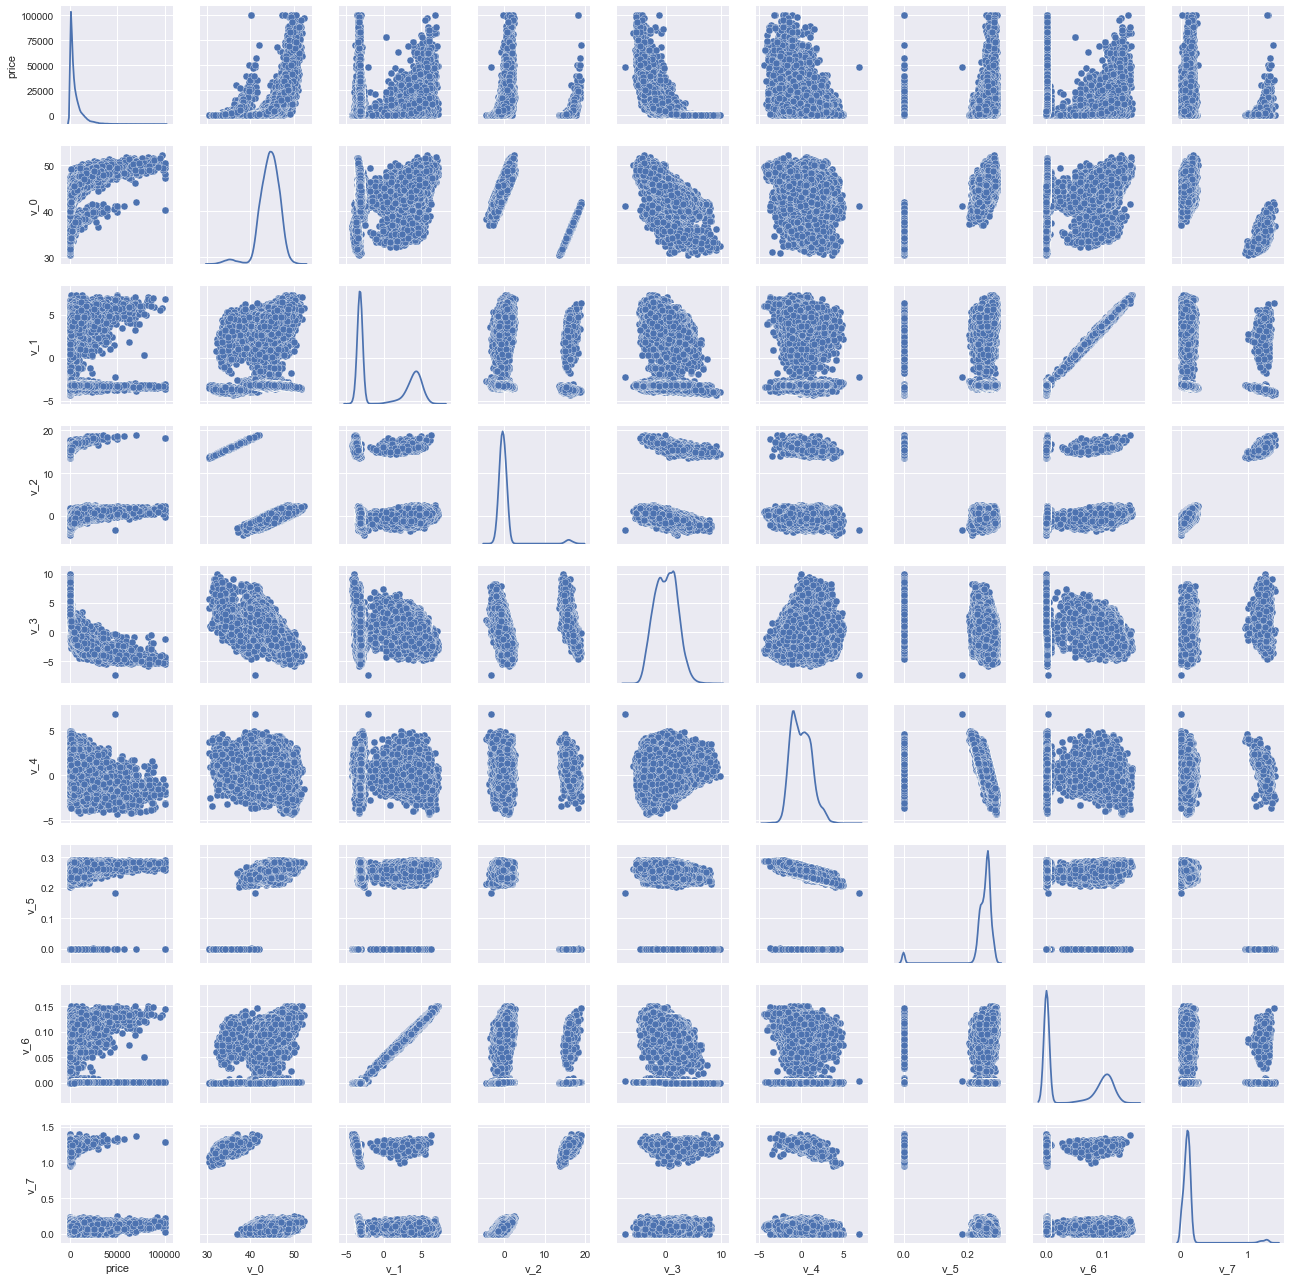

In [58]:
sns.set()
columns = ['price', 'v_0', 'v_1' , 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7']
sns.pairplot(train[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

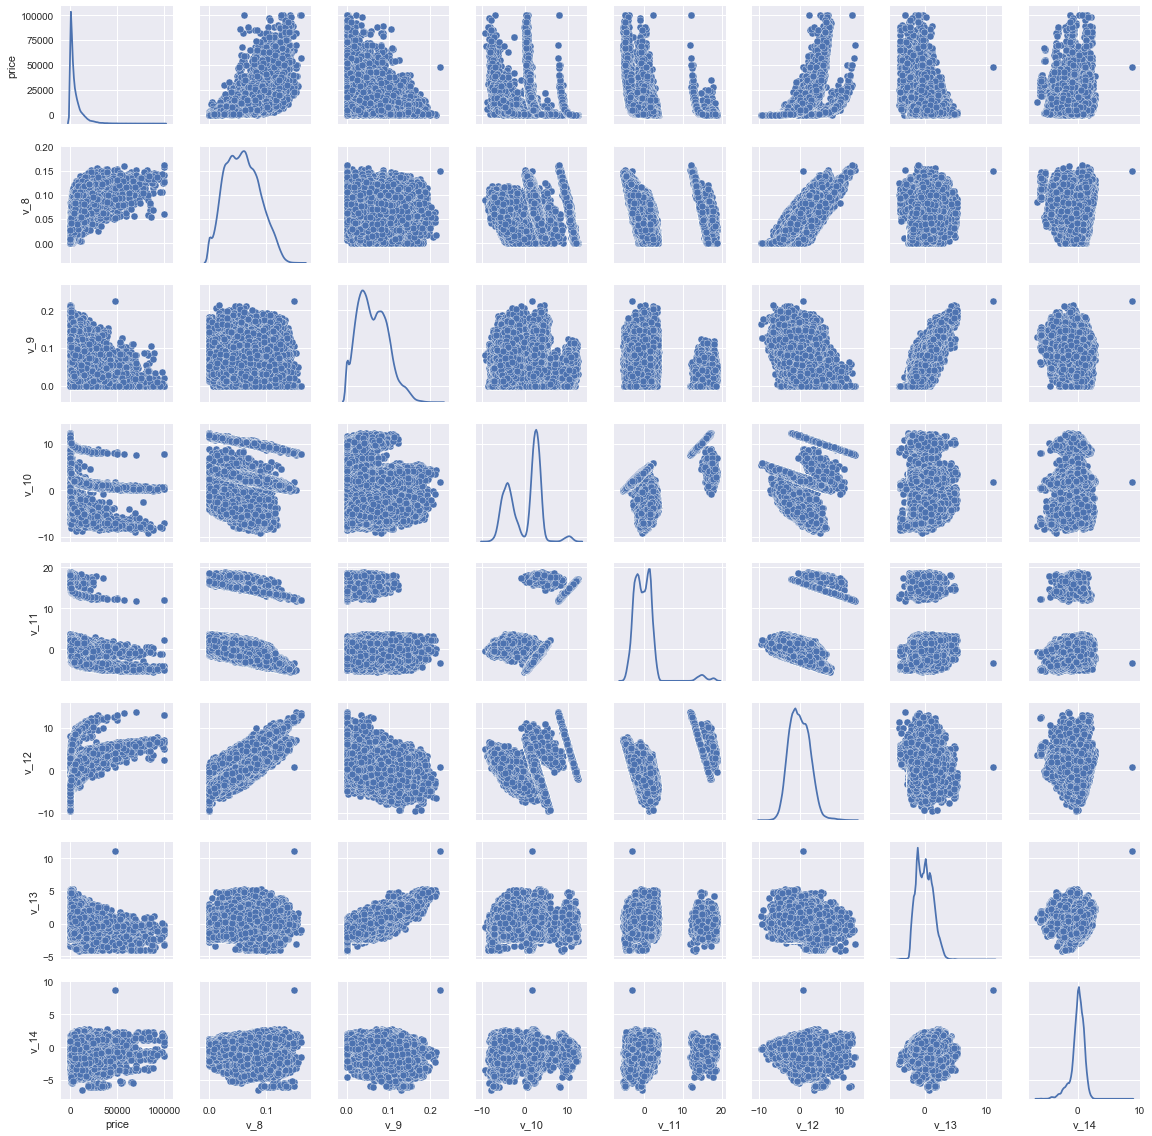

In [91]:
sns.set()
columns = ['price', 'v_8', 'v_9' , 'v_10', 'v_11', 'v_12', 'v_13', 'v_14']
sns.pairplot(train[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()


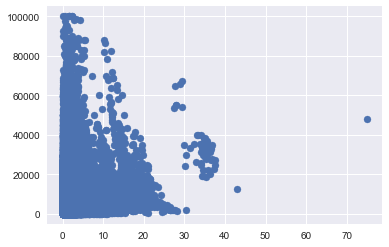

In [289]:
plt.scatter(((train['v_14']).values),Y_data)

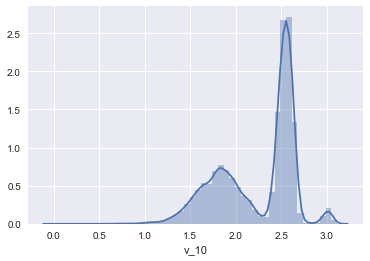

In [261]:
from scipy.special import boxcox1p

b=np.log(train['v_10']+1-np.min(train['v_10']))
sns.distplot(b)

In [290]:
def outliers_proc(data, col_name, scale=3):
"""
用于清洗异常值，默认用 box_plot（scale=3）进行清洗
:param data: 接收 pandas 数据格式
:param col_name: pandas 列名
:param scale: 尺度
:return:
"""
def box_plot_outliers(data_ser, box_scale):
"""
利用箱线图去除异常值
:param data_ser: 接收 pandas.Series 数据格式
:param box_scale: 箱线图尺度，
:return:
"""
iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
val_low = data_ser.quantile(0.25) - iqr
val_up = data_ser.quantile(0.75) + iqr
rule_low = (data_ser < val_low)
rule_up = (data_ser > val_up)
return (rule_low, rule_up), (val_low, val_up)
data_n = data.copy()
data_series = data_n[col_name]
rule, value = box_plot_outliers(data_series, box_scale=scale)
index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
print("Delete number is: {}".format(len(index)))
data_n = data_n.drop(index)
data_n.reset_index(drop=True, inplace=True)
print("Now column number is: {}".format(data_n.shape[0]))
index_low = np.arange(data_series.shape[0])[rule[0]]
outliers = data_series.iloc[index_low]
print("Description of data less than the lower bound is:")
print(pd.Series(outliers).describe())
index_up = np.arange(data_series.shape[0])[rule[1]]
outliers = data_series.iloc[index_up]
print("Description of data larger than the upper bound is:")
print(pd.Series(outliers).describe())
fig, ax = plt.subplots(1, 2, figsize=(10, 7))
sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
return data_n

IndentationError: expected an indented block (<ipython-input-290-b4d48972b678>, line 8)

In [9]:
model_xgb = build_model_xgb(x_train,y_train)
val_xgb = model_xgb.predict(x_val)
MAE_xgb = mean_absolute_error(y_val,val_xgb)
print('MAE of val with xgb:',MAE_xgb)

MAE of val with xgb: 680.0582001778603


In [149]:
X_data['v_0']=np.log(X_data['v_0'])

In [5]:
para_grid=[{'n_estimators':[180],'learning_rate':[0.2],'colsample_bytree':[1],'gamma':[0.04],'max_depth':[11]}]
grid_search=GridSearchCV(xgb.XGBRegressor(),para_grid,cv=3,scoring='neg_mean_absolute_error')
grid_search.fit(x_train,y_train)           

GridSearchCV(cv=3, error_score='raise',
       estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_we...pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [180], 'learning_rate': [0.2], 'colsample_bytree': [1], 'gamma': [0.04], 'max_depth': [11]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [7]:
grid_search.best_params_
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

26.366105553422116 {'colsample_bytree': 1, 'gamma': 0.04, 'learning_rate': 0.2, 'max_depth': 11, 'n_estimators': 180}


In [11]:
para_grid=[{'n_estimators':[180,200],'learning_rate':[0.1,0.2],'colsample_bytree':[1],'gamma':[0.04,0.06],'max_depth':[11,13]}]
grid_search=GridSearchCV(xgb.XGBRegressor(),para_grid,cv=3,scoring='neg_mean_absolute_error')
grid_search.fit(x_train,y_train)           

GridSearchCV(cv=3, error_score='raise',
       estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_we...pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [180, 200], 'learning_rate': [0.1, 0.2], 'colsample_bytree': [1], 'gamma': [0.04, 0.06], 'max_depth': [11, 13]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [12]:
grid_search.best_params_

{'colsample_bytree': 1,
 'gamma': 0.04,
 'learning_rate': 0.1,
 'max_depth': 11,
 'n_estimators': 200}

In [13]:
def build_model_xgb(x_train,y_train):
    model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, gamma=0.04, subsample=0.8,\
        colsample_bytree=1, max_depth=11) #, objective ='reg:squarederror'
    model.fit(x_train, y_train)
    return model

In [14]:
model_xgb = build_model_xgb(x_train,y_train)
val_xgb = model_xgb.predict(x_val)
MAE_xgb = mean_absolute_error(y_val,val_xgb)
print('MAE of val with xgb:',MAE_xgb)

MAE of val with xgb: 657.2944554210425


In [16]:
def build_model_lgb(x_train,y_train):
    estimator = lgb.LGBMRegressor(num_leaves=127,n_estimators = 200)
    param_grid = {
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
    }
    gbm = GridSearchCV(estimator, param_grid)
    gbm.fit(x_train, y_train)
    return gbm
model_lgb = build_model_lgb(x_train,y_train)
val_lgb = model_lgb.predict(x_val)
MAE_lgb = mean_absolute_error(y_val,val_lgb)
print('MAE of val with lgb:',MAE_lgb)

MAE of val with lgb: 669.6806351724929


In [33]:
val_Weighted = (1-MAE_lgb/(MAE_xgb+MAE_lgb))*val_lgb+(1-MAE_xgb/(MAE_xgb+MAE_lgb))*val_xgb

In [34]:
val_Weighted[val_Weighted<0]=10

In [35]:
print('MAE of val with Weighted ensemble:',mean_absolute_error(y_val,val_Weighted))

MAE of val with Weighted ensemble: 646.095887663782


In [42]:
subA_xgb = model_xgb.predict(X_test)

In [43]:
subA_lgb=model_lgb.predict(X_test)

In [44]:
sub_Weighted = (1-MAE_lgb/(MAE_xgb+MAE_lgb))*subA_lgb+(1-MAE_xgb/(MAE_xgb+MAE_lgb))*subA_xgb

In [47]:
sub_Weighted[sub_Weighted<0]=10

(array([3.9672e+04, 7.1890e+03, 2.0610e+03, 6.3100e+02, 2.2600e+02,
        1.0300e+02, 5.9000e+01, 3.3000e+01, 1.6000e+01, 1.0000e+01]),
 array([2.76384445e+00, 8.98386789e+03, 1.79649719e+04, 2.69460760e+04,
        3.59271800e+04, 4.49082841e+04, 5.38893881e+04, 6.28704922e+04,
        7.18515962e+04, 8.08327003e+04, 8.98138043e+04]),
 <a list of 10 Patch objects>)

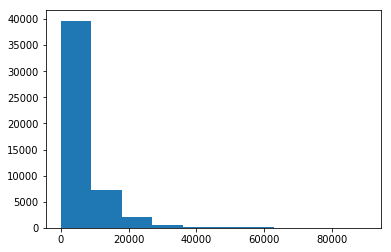

In [49]:
plt.hist(sub_Weighted)

In [54]:
testA=pd.read_csv(r'C:\D\Tianchi\used_car_testA_20200313\used_car_testA_20200313.csv',sep=' ')

In [55]:
sub = pd.DataFrame()
sub['SaleID'] = testA['SaleID']
sub['price'] = sub_Weighted
sub.to_csv(r'C:\D\Tianchi\used_car_submit.csv',index=False)

In [ ]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(x_train,y_train)